In [1]:
#TITLE OF ML PROJECT: IN-VEHICLE COUPON RECOMMENDATION

In [2]:
# NAME: GAYATHRI GIRISH
# ORGANISATION: ENTRI ELEVATE
# DATE:

In [3]:
#1.OVERVIEW OF THE PROBLEM: 
#This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether they will accept the coupon if they are the driver. 

In [4]:
#2.OBJECTIVE:
#The goal is to find whether a person will accept the coupon recommended to him in different driving scenarios

In [5]:
#3.DATA DESCRIPTION: 
#SOURCE: UCI REPOSITORY
#FEATURES: 'destination', 'passanger', 'weather', 'temperature', 'time', 'coupon','expiration', 'gender', 'age', 'maritalStatus', 'has_children','education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse','CarryAway', 'RestaurantLessThan20', 'Restaurant20To50','toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min','direction_same', 'direction_opp', 'Y'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
#4.DATA COLLECTION:
df = pd.read_csv('jupyter/in-vehicle-coupon-recommendation.csv')

In [8]:
print("Dataset Overview:")
print(df.head())

Dataset Overview:
       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN              

In [9]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar           

In [10]:
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values in each column:
destination: 3 unique values
passanger: 4 unique values
weather: 3 unique values
temperature: 3 unique values
time: 5 unique values
coupon: 5 unique values
expiration: 2 unique values
gender: 2 unique values
age: 8 unique values
maritalStatus: 5 unique values
has_children: 2 unique values
education: 6 unique values
occupation: 25 unique values
income: 9 unique values
car: 5 unique values
Bar: 5 unique values
CoffeeHouse: 5 unique values
CarryAway: 5 unique values
RestaurantLessThan20: 5 unique values
Restaurant20To50: 5 unique values
toCoupon_GEQ5min: 1 unique values
toCoupon_GEQ15min: 2 unique values
toCoupon_GEQ25min: 2 unique values
direction_same: 2 unique values
direction_opp: 2 unique values
Y: 2 unique values


In [11]:
#5.DATA PREPROCESSING

In [12]:
# Drop 'car' column due to excessive missing values
df = df.drop(columns=['car'])

In [13]:
# Fill missing values in categorical columns with mode
for col in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

In [14]:
#Replace age categories with numerical values
df['age'] = df['age'].replace({'below21': 20, '50plus': 50})
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [15]:
# Treat invalid 'age' values (like 0) as NaN
df.loc[df['age'] == 0, 'age'] = np.nan

In [16]:
#Drop duplicate rows
df = df.drop_duplicates()

In [17]:
#Check for remaining missing values
print("\nMissing Values After Preprocessing:")
print(df.isnull().sum())


Missing Values After Preprocessing:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


In [18]:
#Fill remaining missing numerical values with median
df.loc[:, 'age'] = df['age'].fillna(df['age'].median())

In [20]:
#Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

In [21]:
# One-Hot Encoding for categorical features
df = pd.get_dummies(df, drop_first=True)

In [22]:
print("\nData after Preprocessing:")
print(df.head())


Data after Preprocessing:
   temperature  gender   age  has_children  toCoupon_GEQ5min  \
0           55       0  21.0             1                 1   
1           80       0  21.0             1                 1   
2           80       0  21.0             1                 1   
3           80       0  21.0             1                 1   
4           80       0  21.0             1                 1   

   toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  Y  \
0                  0                  0               0              1  1   
1                  0                  0               0              1  0   
2                  1                  0               0              1  1   
3                  1                  0               0              1  0   
4                  1                  0               0              1  0   

   ...  CarryAway_less1  CarryAway_never  RestaurantLessThan20_4~8  \
0  ...            False            False               

In [23]:
#6.EDA

In [24]:
# Filter data: Age > 40 and income == 'Less than $12500'
filtered_df = df[(df['age'] > 40) & (df['income_Less than $12500'] == 1)]

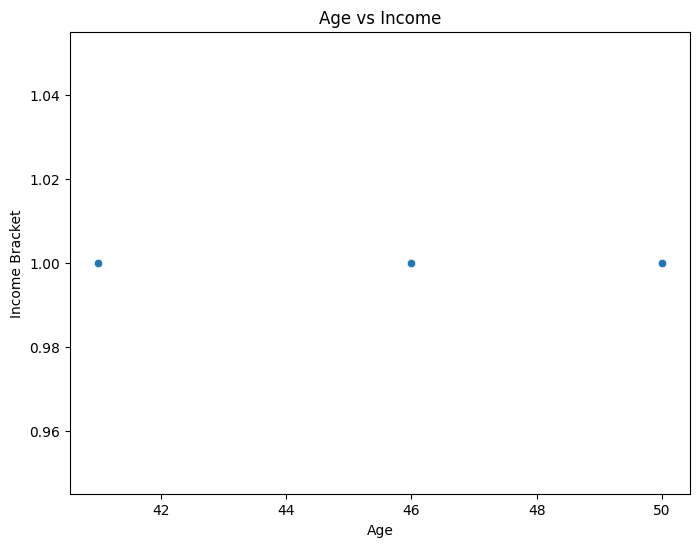

In [25]:
# Age vs Income (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='income_Less than $12500', data=filtered_df)
plt.title("Age vs Income")
plt.xlabel("Age")
plt.ylabel("Income Bracket")
plt.show()

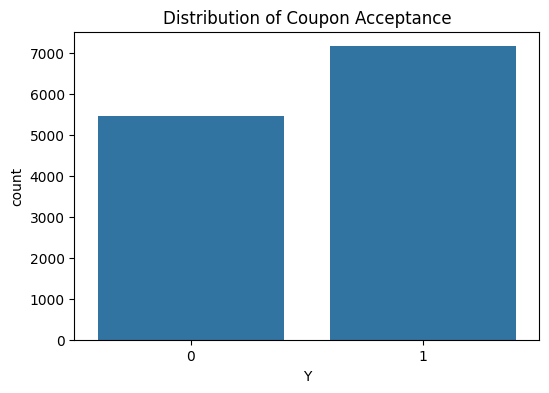

In [26]:
# Distribution of Y (Coupon Acceptance)
plt.figure(figsize=(6, 4))
sns.countplot(x='Y', data=df)
plt.title("Distribution of Coupon Acceptance")
plt.show()

In [27]:
 #FEATURE ENGINEERING

In [29]:
encoded_data = pd.get_dummies(df, drop_first=True)

In [32]:
X = df.drop(columns=['Y'])
y = df['Y']

In [33]:
print("Categorical Variables Encoded!")

Categorical Variables Encoded!


In [34]:
#FEATURE SELECTION

In [51]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [52]:
data = {
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 60000, 70000, 80000, 90000],
    'Gender': [0, 1, 1, 0, 1],  # 0: Female, 1: Male
    'Experience': [1, 5, 10, 15, 20],
    'Target': [0, 1, 0, 1, 1]  # Target variable
}

In [53]:
df = pd.DataFrame(data)

In [54]:
# Feature columns and target column
X = df.drop(columns=['Target'])
y = df['Target']

In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
# Create and fit a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
# Get feature importances
importances = rf.feature_importances_

In [58]:
# Create a DataFrame to view feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

In [59]:
# Sort the features by their importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [60]:
# Display feature importance
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
      Feature  Importance
1      Salary    0.387097
3  Experience    0.274194
0         Age    0.225806
2      Gender    0.112903


In [61]:
# Set a threshold for removing features  
threshold = 0.05
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']

In [62]:
# Filter the dataset to include only the important features
X_selected = X[important_features]

In [63]:
# Display the selected features
print("\nSelected Features after Removing Irrelevant/Redundant Features:")
print(X_selected)


Selected Features after Removing Irrelevant/Redundant Features:
   Salary  Experience  Age  Gender
0   50000           1   25       0
1   60000           5   30       1
2   70000          10   35       1
3   80000          15   40       0
4   90000          20   45       1


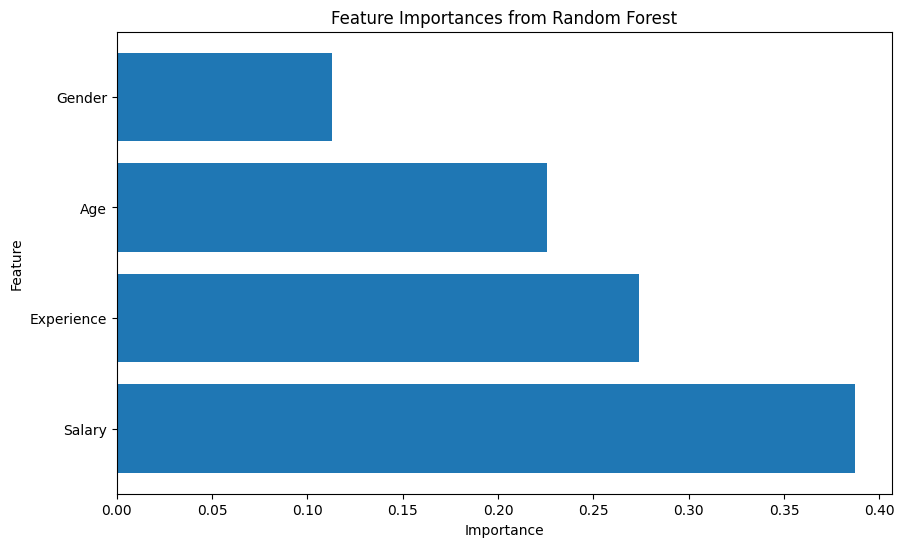

In [64]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.show()

In [65]:
# SelectKBest for Feature Selection with anova values
selector = SelectKBest(score_func=f_classif, k='all')  
selector.fit(X_train, y_train)

SelectKBest(k='all')

In [66]:
# Display selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Age', 'Salary', 'Gender', 'Experience'], dtype='object')


In [67]:
# Get scores for all features
scores = selector.scores_

In [68]:
# Create a DataFrame to view features and their scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': scores
})

In [69]:
# Sort the features by their score
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

In [70]:
# Show the feature scores
print(feature_scores)

      Feature     Score
3  Experience  1.485597
0         Age  1.333333
1      Salary  1.333333
2      Gender  0.333333


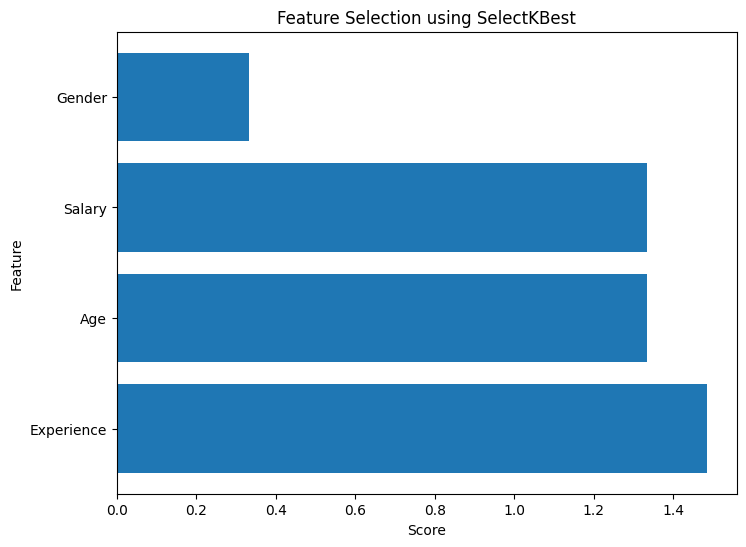

In [71]:
# Plot the scores
plt.figure(figsize=(8, 6))
plt.barh(feature_scores['Feature'], feature_scores['Score'])
plt.title('Feature Selection using SelectKBest')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()